In [7]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sksurv.datasets import load_veterans_lung_cancer

data_x, data_y = load_veterans_lung_cancer()

In [8]:
from sksurv.nonparametric import kaplan_meier_estimator

for group in ("standard", "test"):
    mask = data_x["Treatment"] == group
    time, surv_prob = kaplan_meier_estimator(
        data_y["Status"][mask],
        data_y["Survival_in_days"][mask])

    plt.step(time, surv_prob, where="post",
             label="Treatment = {}".format(group))

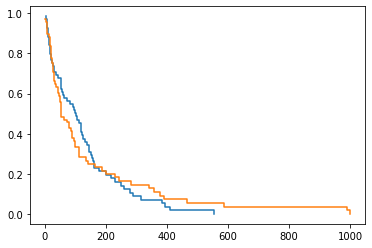

In [9]:
plt.show()

In [11]:
#Why doesn't this cell work?
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxPHSurvivalAnalysis

encoder = OneHotEncoder()
estimator = CoxPHSurvivalAnalysis()
estimator.fit(encoder.fit_transform(data_x), data_y)

data_new_raw = pd.DataFrame()
data_new = encoder.transform(data_new_raw)

pred_curves = estimator.predict_survival_function(data_new)
for curve in pred_curves:
    plt.step(curve.x, curve.y, where="post")

ValueError: 3 features are missing from data: ['Celltype', 'Prior_therapy', 'Treatment']

In [12]:
from sksurv.datasets import load_breast_cancer
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV, KFold

X, y = load_breast_cancer()
Xt = OneHotEncoder().fit_transform(X)

cv = KFold(n_splits=5, shuffle=True, random_state=328)
coxnet = CoxnetSurvivalAnalysis(n_alphas=100,
    l1_ratio=1.0, alpha_min_ratio=0.01).fit(Xt, y)

gcv = GridSearchCV(coxnet,
    {"alphas": [[v] for v in coxnet.alphas_]},
    cv=cv).fit(Xt, y)

C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-pac

ArithmeticError: Numerical error, because weights are too large. Consider increasing alpha.